# Leaf Rice Disease Detection using ResNet50V2 Architecture 

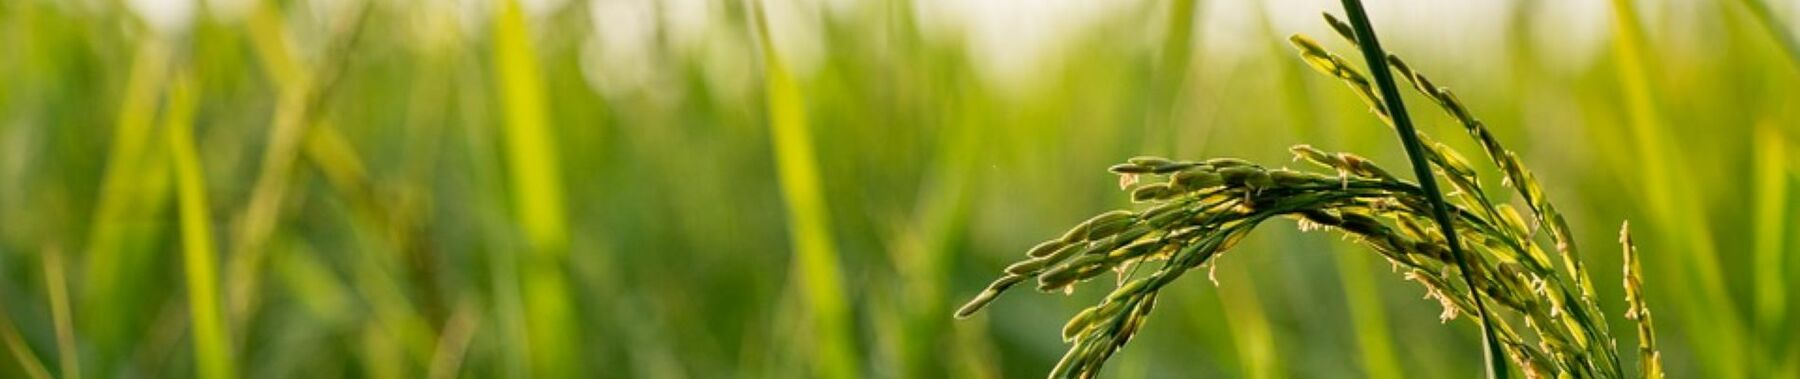

# Taking Dataset from Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [2]:
import keras
from keras import Sequential
from keras.applications import MobileNetV2
from keras.layers import Dense
from keras.preprocessing import image

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
directory = '/content/drive/MyDrive/rice'

# Target Class

In [5]:
Class=[]
for file in os.listdir(directory):
    Class+=[file]
print(Class)
print(len(Class))

['blast', 'blight', 'tungro']
3


# Mapping the Images

In [6]:
Map=[]
for i in range(len(Class)):
    Map = Map+[i]
    
normal_mapping=dict(zip(Class,Map)) 
reverse_mapping=dict(zip(Map,Class)) 

def mapper(value):
    return reverse_mapping[value]

In [7]:
set1=[]
set2=[]
count=0
for i in Class:
    path=os.path.join(directory,i)
    t=0
    for image in os.listdir(path):
        if image[-4:]=='.jpg':
            imagee=load_img(os.path.join(path,image), grayscale=False, color_mode='rgb', target_size=(100,100))
            imagee=img_to_array(imagee)
            imagee=imagee/255.0
            if t<60:
                set1.append([imagee,count])
            else:   
                set2.append([imagee,count])
            t+=1
    count=count+1

# Dividing Data and Test 

In [8]:
data, dataa=zip(*set1)
test, test_test=zip(*set2)

In [9]:
label=to_categorical(dataa)
X=np.array(data)
y=np.array(label)

In [10]:
labell=to_categorical(test_test)
test=np.array(test)
labell=np.array(labell)

In [11]:
print(len(y))
print(len(labell))

180
60


# Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(144, 100, 100, 3) (36, 100, 100, 3)
(144, 3) (36, 3)


# Image Generator

In [14]:
generator = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

# Calling Resnet50V2 Model

In [15]:
from tensorflow.keras.applications import ResNet50V2
resnet50v2 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
resnet50v2.trainable = False

# Making Deep CNN Model

In [16]:
model_input = resnet50v2.input
classifier = tf.keras.layers.Dense(128, activation='relu')(resnet50v2.output)
classifier = tf.keras.layers.Dense(64, activation='relu')(resnet50v2.output)
classifier = tf.keras.layers.Dense(512, activation='relu')(resnet50v2.output)
classifier = tf.keras.layers.Dense(128, activation='relu')(resnet50v2.output)
classifier = tf.keras.layers.Dense(256, activation='relu')(resnet50v2.output)
model_output = tf.keras.layers.Dense(3, activation='sigmoid')(classifier)
model = tf.keras.Model(inputs=model_input, outputs=model_output)

# Compiling with ADAM Optimizer and Binary Crossentropy Loss Function

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Fitting the Dataset into Model

In [18]:
history=model.fit(generator.flow(X_train,y_train,batch_size=32),validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
5/5 [==============================] - 19s 1s/step - loss: 0.8226 - accuracy: 0.4309 - val_loss: 0.5457 - val_accuracy: 0.5556
Epoch 2/50
5/5 [==============================] - 1s 99ms/step - loss: 0.4008 - accuracy: 0.8104 - val_loss: 0.3669 - val_accuracy: 0.6667
Epoch 3/50
5/5 [==============================] - 1s 98ms/step - loss: 0.3141 - accuracy: 0.8288 - val_loss: 0.4243 - val_accuracy: 0.7500
Epoch 4/50
5/5 [==============================] - 1s 97ms/step - loss: 0.2641 - accuracy: 0.8968 - val_loss: 0.3114 - val_accuracy: 0.7500
Epoch 5/50
5/5 [==============================] - 1s 97ms/step - loss: 0.2143 - accuracy: 0.8530 - val_loss: 0.3521 - val_accuracy: 0.8333
Epoch 6/50
5/5 [==============================] - 1s 102ms/step - loss: 0.1752 - accuracy: 0.9215 - val_loss: 0.3219 - val_accuracy: 0.7778
Epoch 7/50
5/5 [==============================] - 1s 107ms/step - loss: 0.2260 - accuracy: 0.8718 - val_loss: 0.2696 - val_accuracy: 0.8611
Epoch 8/50
5/5 [==========

# Prediction on Test Set

In [19]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

# Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[10  0  0]
 [ 0 15  1]
 [ 0  1  9]]


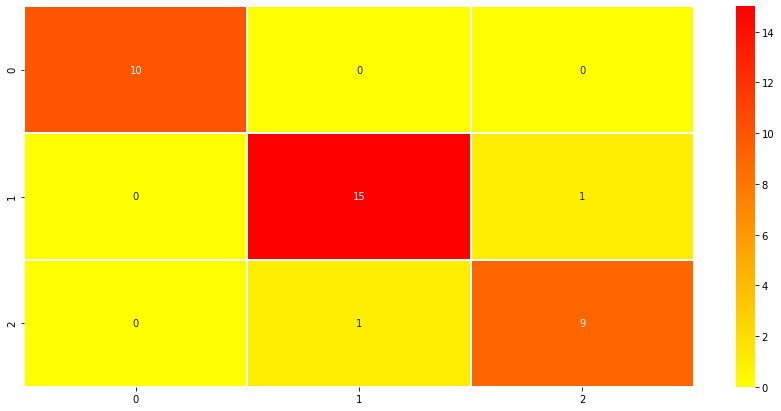

In [21]:
plt.subplots(figsize=(15,7))
sns.heatmap(cm, annot= True, linewidth=1, cmap="autumn_r")

# Accuracy

In [22]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.9444444444444444


# Classification Report

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      0.94      0.94        16
           2       0.90      0.90      0.90        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



# Loss vs Validation Loss Plot


In [24]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=history.history['loss'], name='Loss',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(y=history.history['val_loss'], name='Validation Loss',
                         line=dict(color='firebrick', width=2)))

# Accuracy vs Validation Accuracy Plot

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=history.history['accuracy'], name='Accuracy',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(y=history.history['val_accuracy'], name='Validation Accuracy',
                         line=dict(color='firebrick', width=3)))

# Testing on some Random Images

In [26]:
image=load_img("/content/drive/MyDrive/rice/tungro/IMG_0852.jpg",target_size=(100,100))
imagee=load_img("/content/drive/MyDrive/rice/blight/IMG_0936.jpg",target_size=(100,100))
imageee=load_img("/content/drive/MyDrive/rice/blast/IMG_0560.jpg",target_size=(100,100))
imageeee=load_img("/content/drive/MyDrive/rice/blight/IMG_1063.jpg",target_size=(100,100))
imageeeee=load_img("/content/drive/MyDrive/rice/tungro/IMG_0898.jpg",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)
imagee=img_to_array(imagee) 
imagee=imagee/255.0
prediction_imagee=np.array(imagee)
prediction_imagee= np.expand_dims(imagee, axis=0)
imageee=img_to_array(imageee) 
imageee=imageee/255.0
prediction_imageee=np.array(imageee)
prediction_imageee= np.expand_dims(imageee, axis=0)
imageeee=img_to_array(imageeee) 
imageeee=imageeee/255.0
prediction_imageeee=np.array(imageeee)
prediction_imageeee= np.expand_dims(imageeee, axis=0)
imageeeee=img_to_array(imageeeee) 
imageeeee=image/255.0
prediction_imageeeee=np.array(imageeeee)
prediction_imageeeee= np.expand_dims(imageeeee, axis=0)

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("This Rice Belongs to", move_name + " class")
prediction=model.predict(prediction_imagee)
value=np.argmax(prediction)
move_name=mapper(value)
print("This Rice Belongs to", move_name + " class")
prediction=model.predict(prediction_imageee)
value=np.argmax(prediction)
move_name=mapper(value)
print("This Rice Belongs to", move_name + " class")
prediction=model.predict(prediction_imageeee)
value=np.argmax(prediction)
move_name=mapper(value)
print("This Rice Belongs to", move_name + " class")
prediction=model.predict(prediction_imageeeee)
value=np.argmax(prediction)
move_name=mapper(value)
print("This Rice Belongs to", move_name + " class")

This Rice Belongs to tungro class
This Rice Belongs to blight class
This Rice Belongs to blast class
This Rice Belongs to blight class
This Rice Belongs to tungro class


# Prediction on Different Test Set

In [27]:
print(test.shape)
predictionn=model.predict(test)
print(predictionn.shape)

(60, 100, 100, 3)
(60, 3)


In [28]:
test_pred=[]
for item in predictionn:
    value=np.argmax(item)      
    test_pred = test_pred + [value]

# Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_test,test_pred)
print(cm)

[[19  1  0]
 [ 0 20  0]
 [ 1  0 19]]


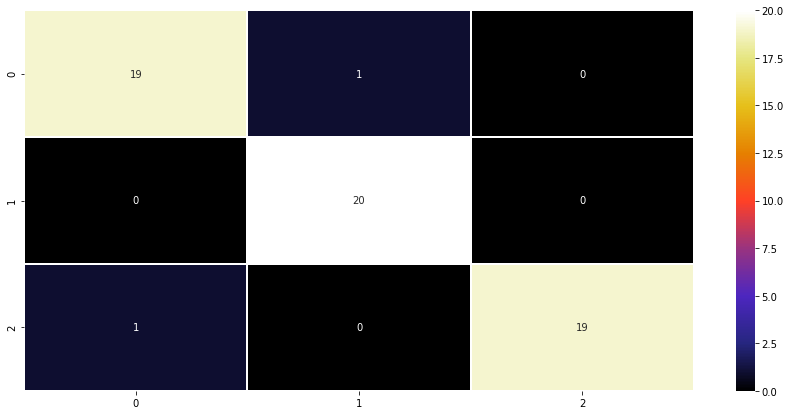

In [30]:
plt.subplots(figsize=(15,7))
sns.heatmap(cm, annot= True, linewidth=1, cmap="CMRmap")

# Accuracy

In [35]:
accuracy=accuracy_score(test_test,test_pred)
print("Model Accuracy : ",accuracy)

Model Accuracy :  0.9706666666666667


# Classification Report

In [32]:
print(classification_report(test_test,test_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.95      1.00      0.98        20
           2       1.00      0.95      0.97        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



# This Model can Successfully Detects The Disease of a Rice Leaf with an Accuracy of 97%